<a href="https://colab.research.google.com/github/AliAli7299/Predicting_Student_Performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggplot2")
install.packages("reshape2")
install.packages("corrplot")
install.packages("tidyverse")
install.packages("randomForest")
library(randomForest)
library(tidyr)
library(corrplot)
library(ggplot2)
library(reshape2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


corrplot 0.95 loaded


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data <- read.csv("/content/student dropout.csv")

In [ ]:
head(data)

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,⋯,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,3,4,1,1,3,4,0,11,11,False
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,3,3,1,1,3,2,9,11,11,False
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,3,2,2,3,3,6,12,13,12,False
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,2,2,1,1,5,0,14,14,14,False
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,3,2,1,2,5,0,11,13,13,False
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,4,2,1,2,5,6,12,12,13,False


In [ ]:
summary(select_if(data, is.numeric))

      Age        Mother_Education Father_Education  Travel_Time   
 Min.   :15.00   Min.   :0.000    Min.   :0.000    Min.   :1.000  
 1st Qu.:16.00   1st Qu.:2.000    1st Qu.:1.000    1st Qu.:1.000  
 Median :17.00   Median :2.000    Median :2.000    Median :1.000  
 Mean   :16.74   Mean   :2.515    Mean   :2.307    Mean   :1.569  
 3rd Qu.:18.00   3rd Qu.:4.000    3rd Qu.:3.000    3rd Qu.:2.000  
 Max.   :22.00   Max.   :4.000    Max.   :4.000    Max.   :4.000  
   Study_Time    Number_of_Failures Family_Relationship   Free_Time   
 Min.   :1.000   Min.   :0.0000     Min.   :1.000       Min.   :1.00  
 1st Qu.:1.000   1st Qu.:0.0000     1st Qu.:4.000       1st Qu.:3.00  
 Median :2.000   Median :0.0000     Median :4.000       Median :3.00  
 Mean   :1.931   Mean   :0.2219     Mean   :3.931       Mean   :3.18  
 3rd Qu.:2.000   3rd Qu.:0.0000     3rd Qu.:5.000       3rd Qu.:4.00  
 Max.   :4.000   Max.   :3.0000     Max.   :5.000       Max.   :5.00  
   Going_Out     Weekend_Alcohol_C

Age has a median of 17, meaning these are school students. Mean of grades is around 11.4 which is above the passing threshhold, and number of absences has a median of 2.

In [ ]:
str(data)

'data.frame':	649 obs. of  34 variables:
 $ School                     : chr  "GP" "GP" "GP" "GP" ...
 $ Gender                     : chr  "F" "F" "F" "F" ...
 $ Age                        : int  18 17 15 15 16 16 16 17 15 15 ...
 $ Address                    : chr  "U" "U" "U" "U" ...
 $ Family_Size                : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Parental_Status            : chr  "A" "T" "T" "T" ...
 $ Mother_Education           : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Father_Education           : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mother_Job                 : chr  "at_home" "at_home" "at_home" "health" ...
 $ Father_Job                 : chr  "teacher" "other" "other" "services" ...
 $ Reason_for_Choosing_School : chr  "course" "course" "other" "home" ...
 $ Guardian                   : chr  "mother" "father" "mother" "mother" ...
 $ Travel_Time                : int  2 1 1 1 1 1 1 2 1 1 ...
 $ Study_Time                 : int  2 2 2 3 2 2 2 2 2 2 ...
 $ Number_of_Failures         : int  0

*   Address: Type of residence (U for urban, R for rural).
*  Family_Size: Size of the family (GT3 for greater than 3, LE3 for less than or equal to 3).
*   Parental_Status: Living arrangement of parents (A for living together, T for living apart).
*   Mother_Education: Education level of the mother (0 to 4).
*   Father_Education: Education level of the father (0 to 4).
*   Mother_Job: Type of job held by the mother.
*   Father_Job: Type of job held by the father..
*   Study_Time: Weekly study hours (1 to 4).
*   Number_of_Failures: Number of past class failures.
*   School_Support: Whether the student receives extra educational support (yes/no).
*   Family_Support: Family provided educational support (yes/no).
*   Extra_Paid_Class: Participation in extra paid classes (yes/no).
*   Extra_Curricular_Activities: Involvement in extracurricular activities (yes/no).
*   Family_Relationship: Quality of family relationships (scale 1 to 5).
*   Free_Time: Amount of free time after school (scale 1 to 5).
*   Going_Out: Frequency of going out with friends (scale 1 to 5).
*   Number_of_Absences: Total number of absences from school.
*   Grade_1: Grade received in the first assessment.
*   Grade_2: Grade received in the second assessment.
*   Final_Grade: Final grade received (G3).
*   Dropped_Out: Indicator of whether the student has dropped out (True/False).

In [ ]:
sum(is.na(data))

[1] 0

In [ ]:
unique(data$School)

[1] "GP" "MS"

In [ ]:
unique(data$Dropped_Out)

[1] "False" "True"

In [ ]:
dim(data)

[1] 649  34

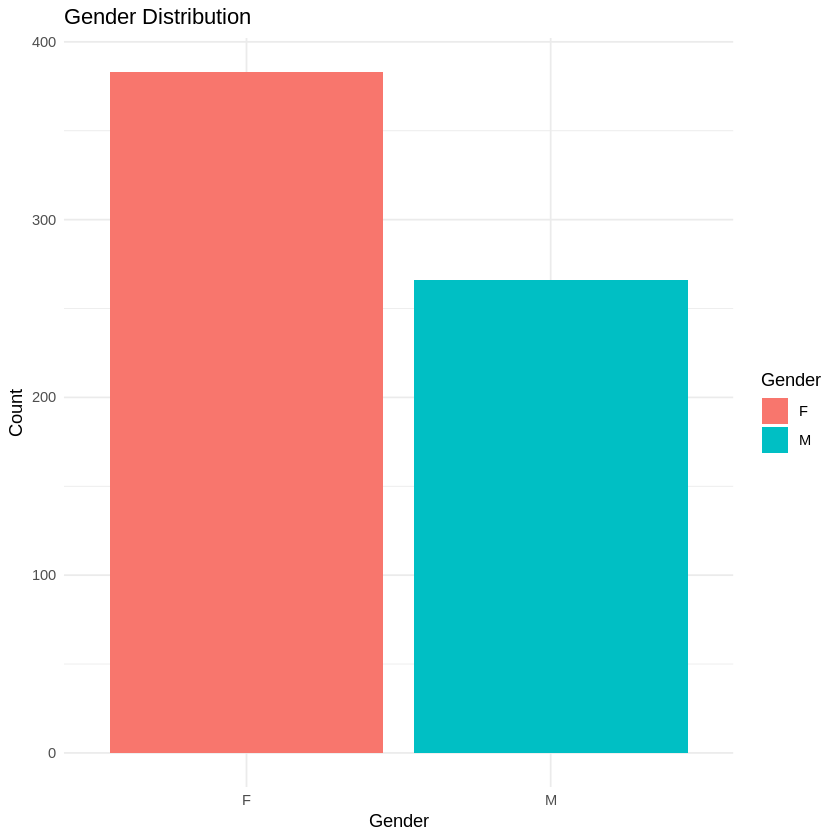

In [ ]:
ggplot(data, aes(x = Gender, fill = Gender)) +
  geom_bar() +
  labs(title = "Gender Distribution", x = "Gender", y = "Count") +
  theme_minimal()


Females are more than males in this dataset.


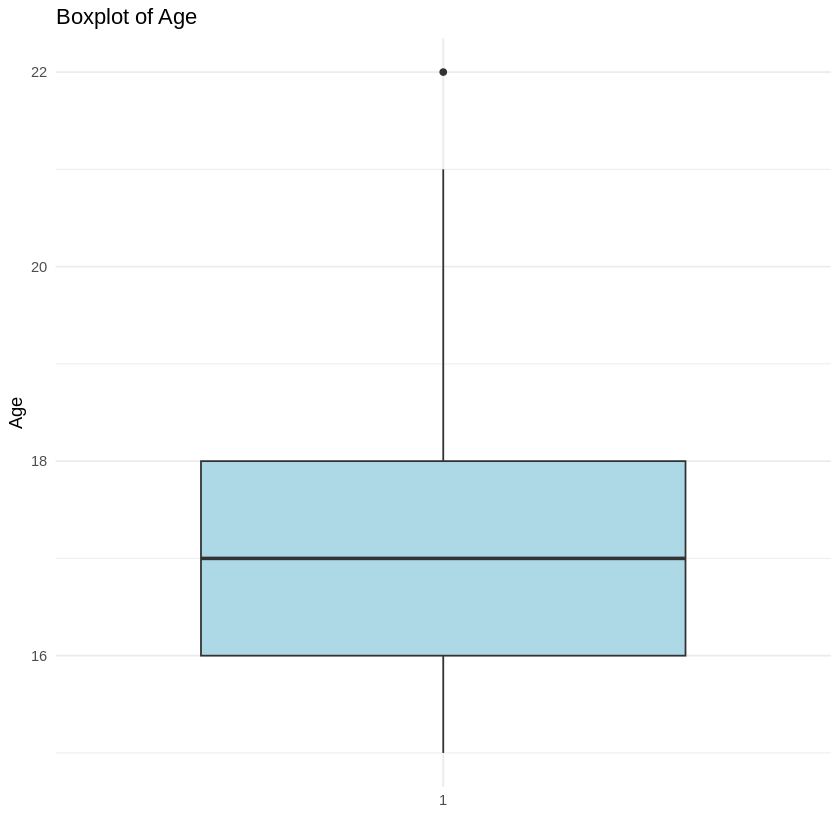

In [ ]:
ggplot(data, aes(x = factor(1), y = Age)) +
  geom_boxplot(fill = "lightblue") +
  theme_minimal() +
  labs(title = "Boxplot of Age", x = "", y = "Age")

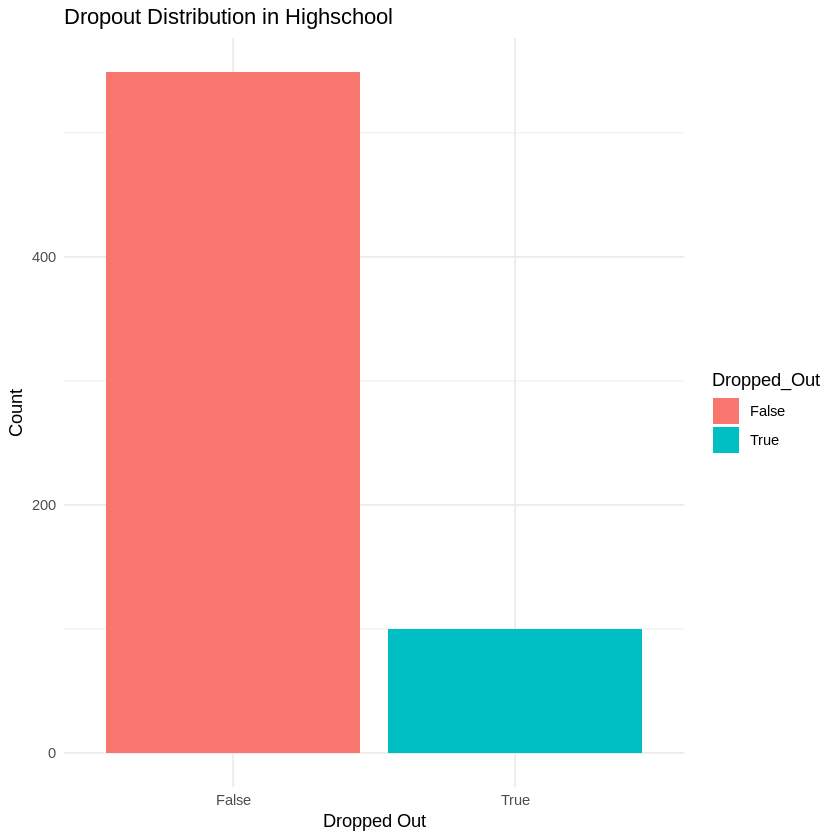

In [ ]:
ggplot(data, aes(x = Dropped_Out, fill = Dropped_Out)) +
  geom_bar() +
  labs(title = "Dropout Distribution in Highschool", x = "Dropped Out", y = "Count") +
  theme_minimal()

We can see that majority of students choose to remain in school.
# In this section, we will analyze factors that affect dropout rates.


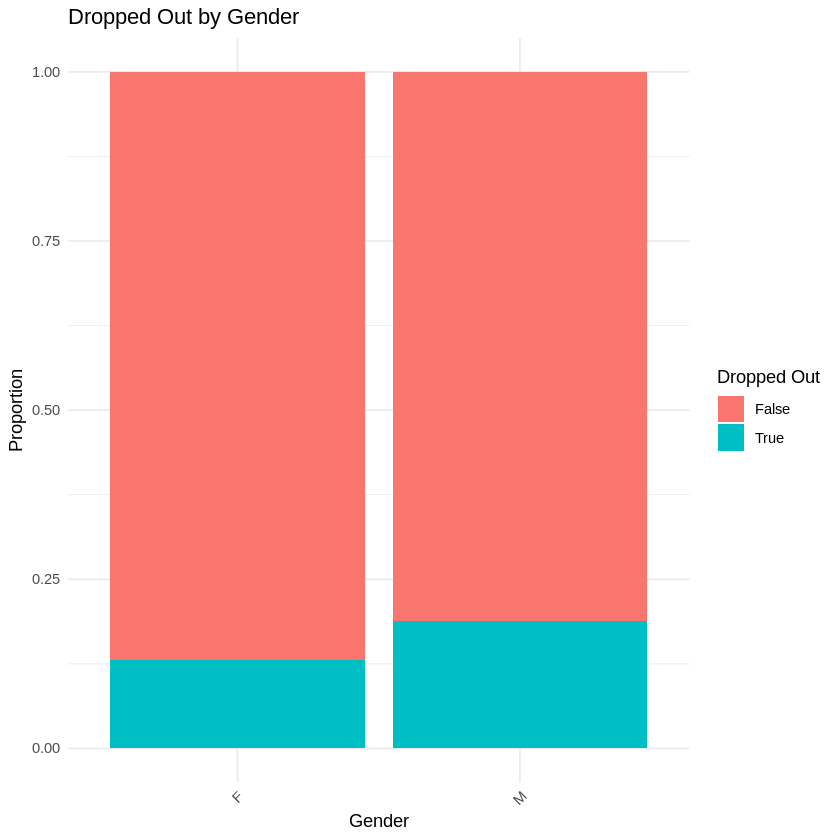

In [ ]:
normalized_crosstable_gender<- prop.table(table(data$Dropped_Out,data$Gender), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_gender)
colnames(df_plot) <- c("Dropped_Out", "Gender", "Proportion")
# Plot stacked bar chart
ggplot(df_plot, aes(x = Gender, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out by Gender", x = "Gender", y = "Proportion", fill = "Dropped Out") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Males are more likely to dropout than females

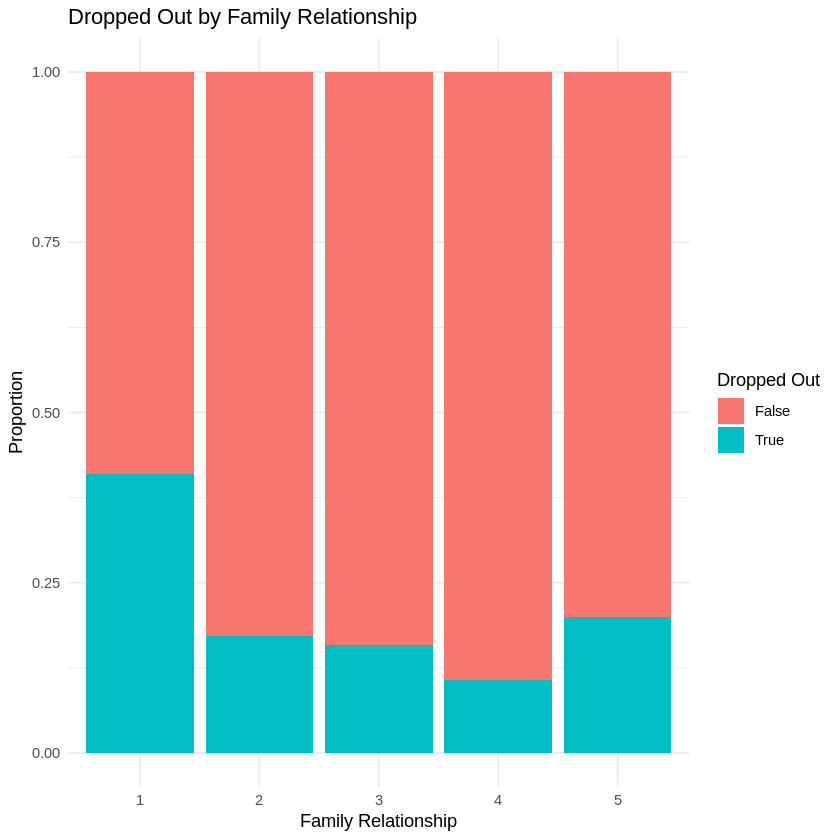

In [ ]:
normalized_crosstable_familyrls <- prop.table(table(data$Dropped_Out,data$Family_Relationship), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_familyrls)
colnames(df_plot) <- c("Dropped_Out", "Family_Relationship", "Proportion")

# Plot stacked bar chart
ggplot(df_plot, aes(x = Family_Relationship, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out by Family Relationship", x = "Family Relationship", y = "Proportion", fill = "Dropped Out") +
  theme_minimal()

**We can see that the worse the quality of family relationships, the higher the dropout rates.**

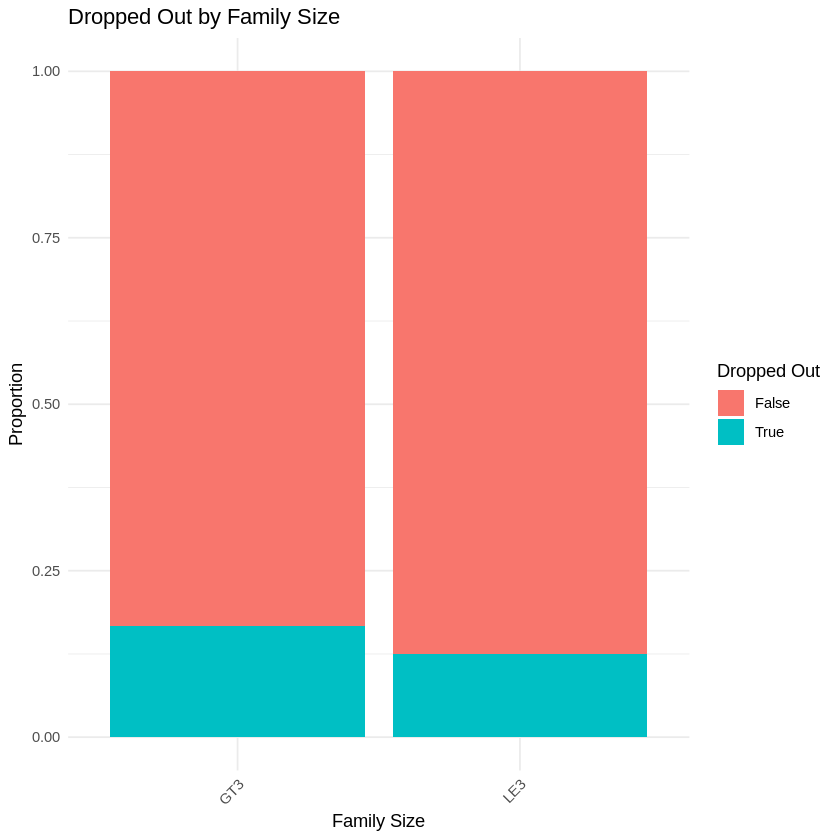

In [ ]:
normalized_crosstable_familysize <- prop.table(table(data$Dropped_Out,data$Family_Size), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_familysize)
colnames(df_plot) <- c("Dropped_Out", "Family_Size", "Proportion")
ggplot(df_plot, aes(x = Family_Size, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out by Family Size", x = "Family Size", y = "Proportion", fill = "Dropped Out") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Family size does not have a significant effect on dropout rates.


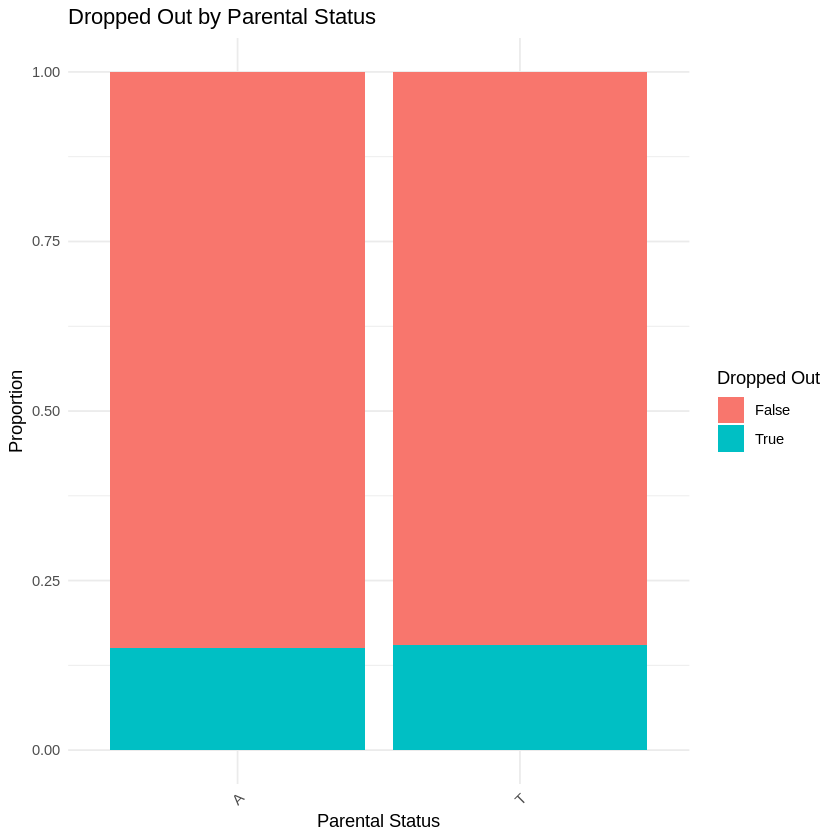

In [ ]:
normalized_crosstable_Pstatus <- prop.table(table(data$Dropped_Out,data$Parental_Status), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_Pstatus)
colnames(df_plot) <- c("Dropped_Out", "Parental_Status", "Proportion")
ggplot(df_plot, aes(x = Parental_Status, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out by Parental Status", x = "Parental Status", y = "Proportion", fill = "Dropped Out") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Living arrangements also do not have a sigfnicant effect on dropout rates.

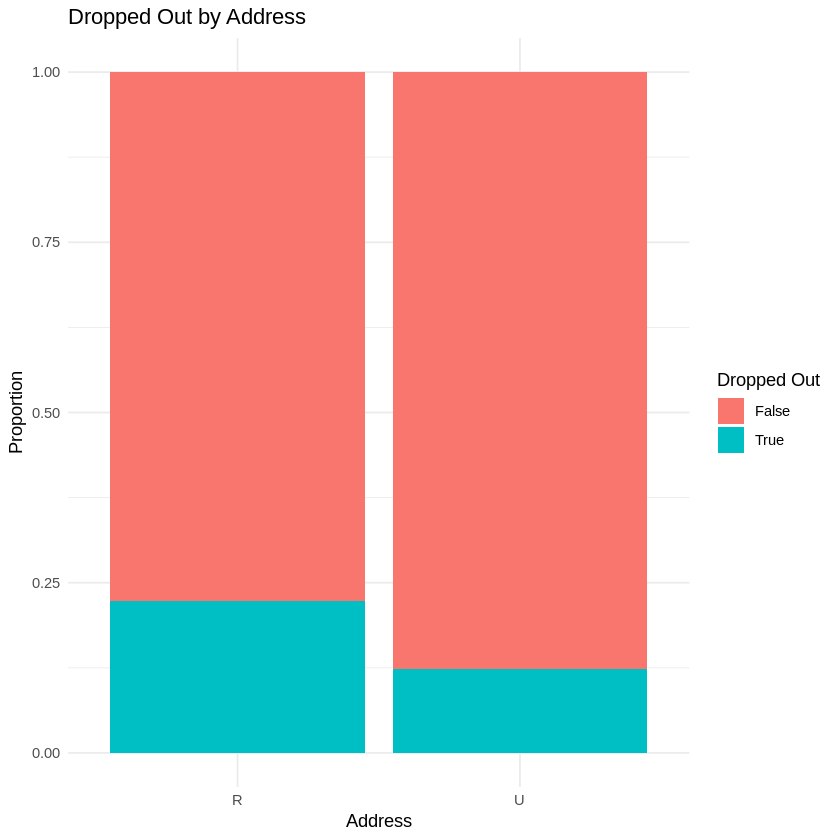

In [ ]:
normalized_crosstable_Address <- prop.table(table(data$Dropped_Out,data$Address), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_Address)
colnames(df_plot) <- c("Dropped_Out", "Address", "Proportion")
ggplot(df_plot, aes(x = Address, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out by Address", x = "Address", y = "Proportion", fill = "Dropped Out") +
  theme_minimal()

Rural areas have a slightly higher dropout rate than urban areas.

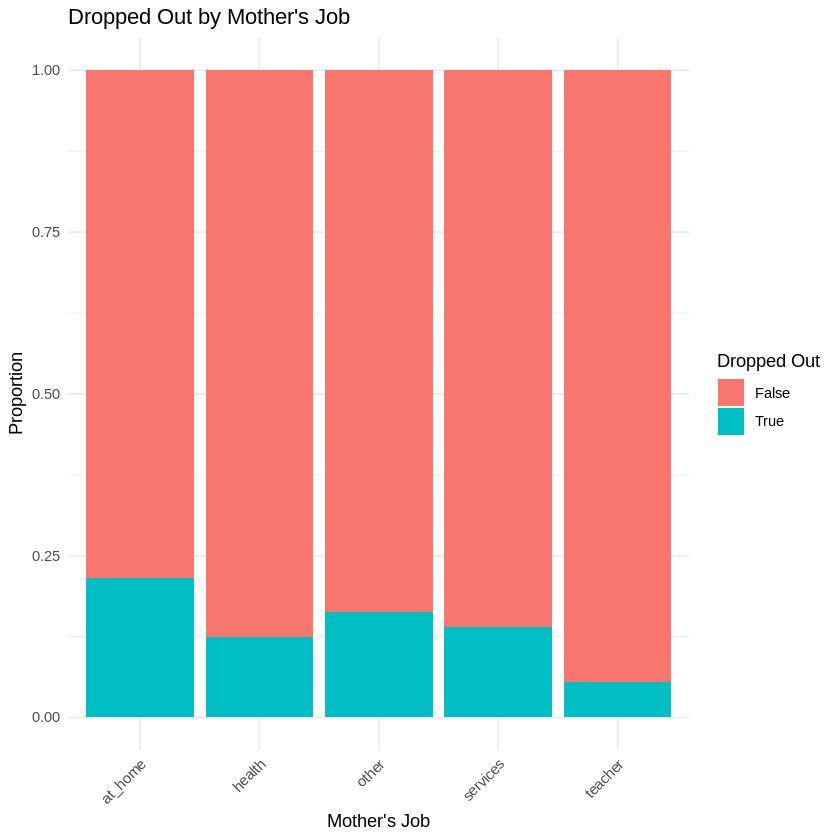

In [ ]:
normalized_crosstable_Mjob <- prop.table(table(data$Dropped_Out,data$Mother_Job), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_Mjob)
colnames(df_plot) <- c("Dropped_Out", "Mother_Job", "Proportion")
ggplot(df_plot, aes(x = Mother_Job, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out by Mother's Job", x = "Mother's Job", y = "Proportion", fill = "Dropped Out") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The student is very unlikely to dropout when their mother is a teacher, while he's most likely to dropout when his mother is at home.

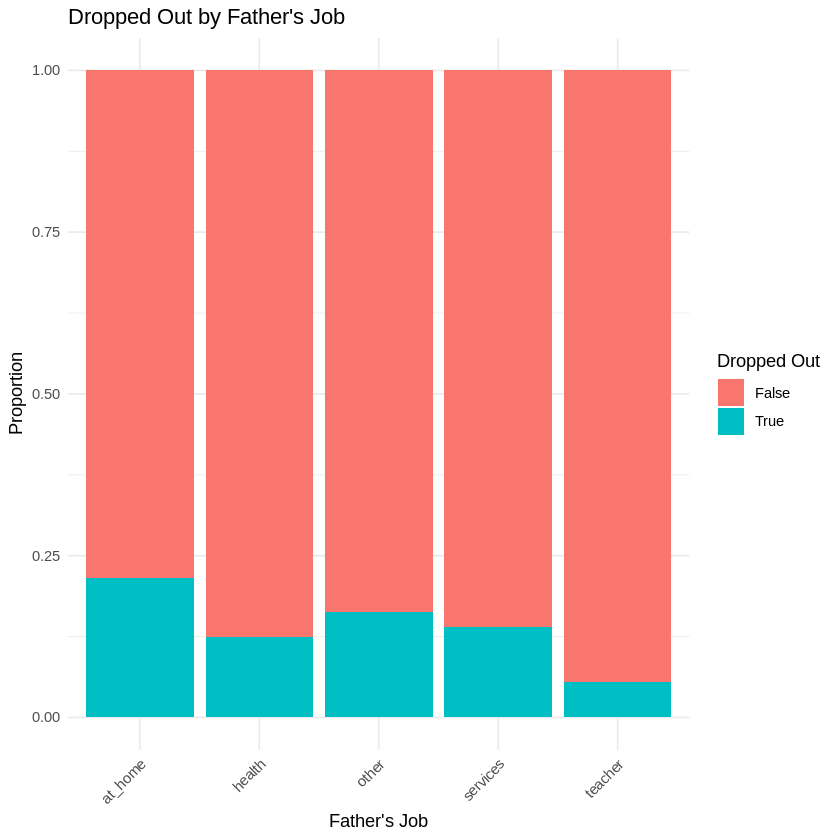

In [ ]:
normalized_crosstable_Fjob <- prop.table(table(data$Dropped_Out,data$Father_Job), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_Mjob)
colnames(df_plot) <- c("Dropped_Out", "Father_Job", "Proportion")
ggplot(df_plot, aes(x = Father_Job, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out by Father's Job", x = "Father's Job", y = "Proportion", fill = "Dropped Out") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Similar to mother's job, the student's dropout rates are the lowest when the father is a teacher, and the highest when the father is in services.

In [ ]:
normalized_crosstable_Reasonschool <- prop.table(table(data$Dropped_Out,data$Reason_for_Choosing_School), margin = 2)

normalized_crosstable_Reasonschool

       
            course       home      other reputation
  False 0.80701754 0.88590604 0.75000000 0.93006993
  True  0.19298246 0.11409396 0.25000000 0.06993007

Children who choose their schools based on its reputation have the lowest chances of dropping out.

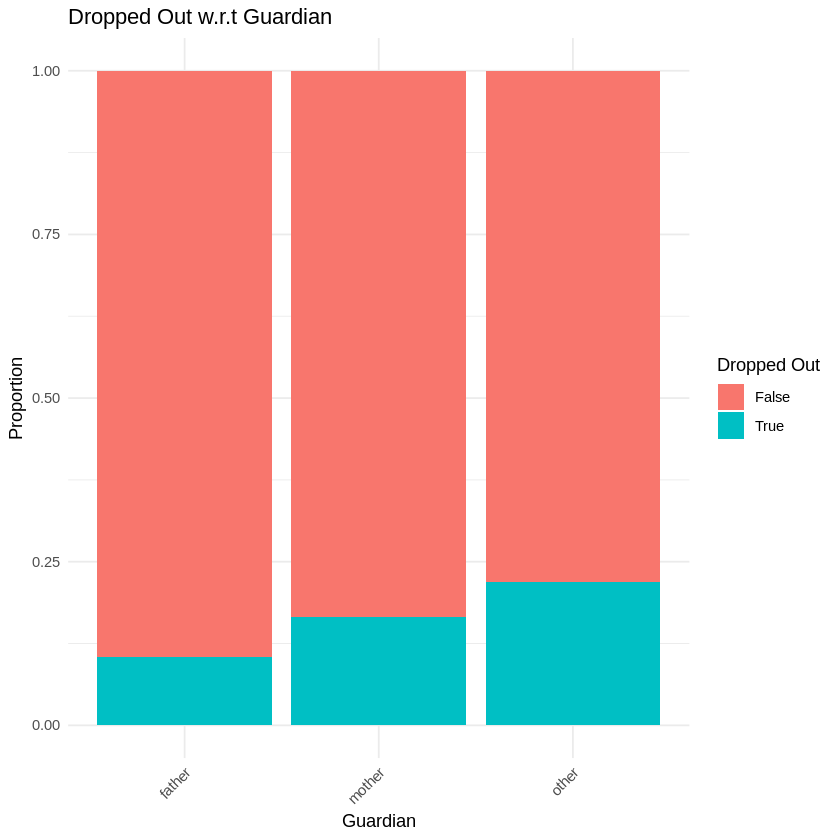

In [ ]:
normalized_crosstable_Guardian <- prop.table(table(data$Dropped_Out,data$Guardian), margin = 2)

df_plot <- as.data.frame(normalized_crosstable_Guardian)
colnames(df_plot) <- c("Dropped_Out", "Guardian", "Proportion")
ggplot(df_plot, aes(x = Guardian, y = Proportion, fill = as.factor(Dropped_Out))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Dropped Out w.r.t Guardian", x = "Guardian", y = "Proportion", fill = "Dropped Out") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Having someone other than the mother and father as guardian increases the chances of dropping out.

# In this next step, we'll turn binary columns (yes/no or true/false) to numerical binary ones and create a correlation map.

In [ ]:
binary_data <- data %>%
  mutate(across(c(School_Support, Family_Support, Extra_Paid_Class, Internet_Access,Extra_Curricular_Activities,Attended_Nursery,
                  Wants_Higher_Education,In_Relationship), ~ ifelse(. == "yes", 1, 0)))
str(binary_data)

'data.frame':	649 obs. of  34 variables:
 $ School                     : chr  "GP" "GP" "GP" "GP" ...
 $ Gender                     : chr  "F" "F" "F" "F" ...
 $ Age                        : int  18 17 15 15 16 16 16 17 15 15 ...
 $ Address                    : chr  "U" "U" "U" "U" ...
 $ Family_Size                : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Parental_Status            : chr  "A" "T" "T" "T" ...
 $ Mother_Education           : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Father_Education           : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mother_Job                 : chr  "at_home" "at_home" "at_home" "health" ...
 $ Father_Job                 : chr  "teacher" "other" "other" "services" ...
 $ Reason_for_Choosing_School : chr  "course" "course" "other" "home" ...
 $ Guardian                   : chr  "mother" "father" "mother" "mother" ...
 $ Travel_Time                : int  2 1 1 1 1 1 1 2 1 1 ...
 $ Study_Time                 : int  2 2 2 3 2 2 2 2 2 2 ...
 $ Number_of_Failures         : int  0

Now we need to transform Dropped_out to a binary of 0's and 1's.

In [ ]:
binary_data$Dropped_Out <- ifelse(data$Dropped_Out == "True", 1, 0)

table(binary_data$Dropped_Out)
str(binary_data$Dropped_Out)


  0   1 
549 100 

 num [1:649] 0 0 0 0 0 0 0 0 0 0 ...


Now let's create a correlation heatmap

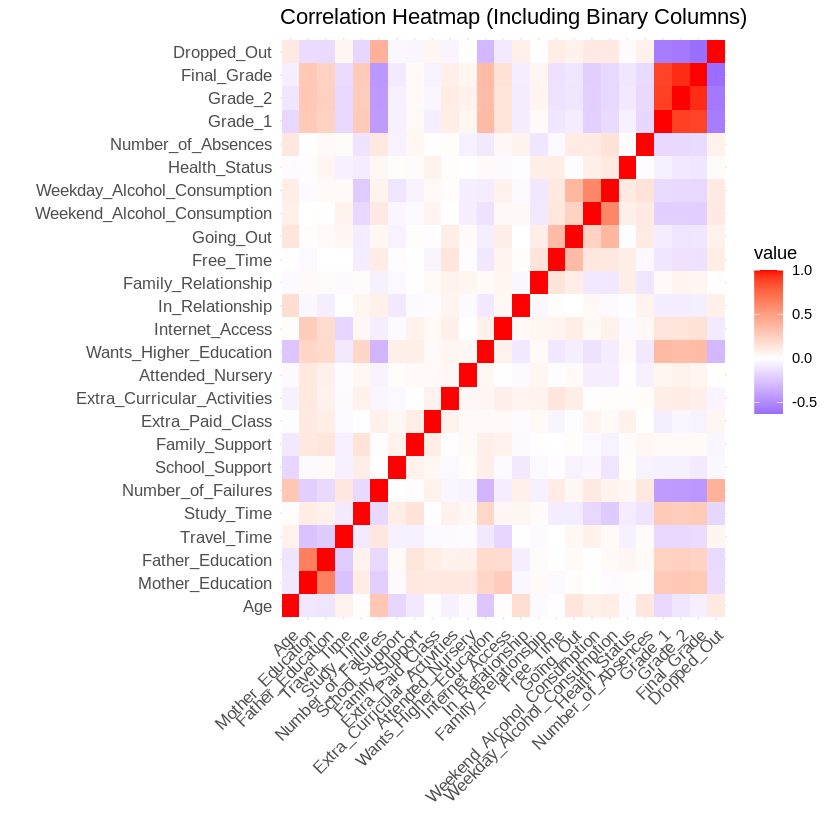

In [ ]:
num_data <- binary_data %>%
  select(where(is.numeric)) %>%  # Keep only numeric columns
  mutate(across(where(is.integer), as.numeric))     # Ensure all integers are numeric

cor_matrix <- cor(num_data, use = "pairwise.complete.obs", method = "spearman")

melted_cor <- melt(cor_matrix)

ggplot(melted_cor, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlation Heatmap (Including Binary Columns)", x = "", y = "") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
        axis.text.y = element_text(size = 10))

**This map gives us important insights. Firstly, Grades and Dropout rates are negatively correlated. That means that as grades decrease, dropout rates increase. Hence, any factor that causes grades to decrease also causes dropout rates to increase. So factors that are negatively correlated with grades, like Number of failures and Alcohol consumption cause higher dropout rates as they increase, while factors that are positively correlated with grades like study time, father's education, mother's education, and wanting higher education cause lower dropout rates as they increase.**

# Let's try to detect correlation between factors and grades.

In [ ]:
aggregate_categorical_school <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ School, data = data, FUN = mean)

aggregate_categorical_school

School,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
GP,11.98582,12.14421,12.57683
MS,10.30088,10.49558,10.65044


GP students have significantly better grades than MS students.

In [ ]:
aggregate_categorical_Gender <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Gender, data = data, FUN = mean)

aggregate_categorical_Gender

Gender,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
F,11.63708,11.82245,12.25326
M,11.05639,11.20677,11.40602


Females are slightly better at school than males.

In [ ]:
aggregate_categorical_Address <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Address, data = data, FUN = mean)

aggregate_categorical_Address

Address,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
R,10.74619,10.88832,11.08629
U,11.68363,11.86726,12.26327


People living in rural areas get lower grades generally than people living in urban areas.

In [ ]:
aggregate_categorical_Familysize <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Family_Size, data = data, FUN = mean)

aggregate_categorical_Familysize

Family_Size,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
GT3,11.31510,11.49672,11.81182
LE3,11.59896,11.74479,12.13021


There is no significant difference in grades when it comes to family size

In [ ]:
aggregate_categorical_Pstatus <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Parental_Status, data = data, FUN = mean)

aggregate_categorical_Pstatus

Parental_Status,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
A,11.28750,11.42500,11.9125
T,11.41476,11.59051,11.9051


No significant difference either when it comes to parental status.

In [ ]:
aggregate_categorical_Mjob<- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Mother_Job, data = data, FUN = mean)

aggregate_categorical_Mjob

Mother_Job,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
at_home,10.45185,10.71111,11.04444
health,12.39583,12.64583,13.06250
other,11.27519,11.42636,11.67054
services,11.61029,11.72059,12.14706
teacher,12.55556,12.69444,13.13889


When it comes to mother's job, the highest grades are when mothers are teachers, and the lowest are when mothers are stay at home mothers.

In [ ]:
aggregate_categorical_Fjob <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Father_Job, data = data, FUN = mean)

aggregate_categorical_Fjob

Father_Job,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
at_home,10.40476,10.78571,11.42857
health,12.04348,12.26087,12.56522
other,11.36240,11.54223,11.89101
services,11.29282,11.37017,11.62983
teacher,13.05556,13.33333,13.58333


Very similar to mother's job, where highest grades are for teacher fathers and lowest grades are for stay at home fathers.

In [ ]:
aggregate_categorical_Reasonschool <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Reason_for_Choosing_School, data = data, FUN = mean)

aggregate_categorical_Reasonschool

Reason_for_Choosing_School,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
course,10.98246,11.14737,11.54737
home,11.65772,11.78523,12.18121
other,10.69444,10.77778,10.69444
reputation,12.31469,12.58741,12.94406


People who choose schools based on reputation have the highest grades, while those who choose based on courses tend to have the worst grades.

In [ ]:
aggregate_categorical_Guardian <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Guardian, data = data, FUN = mean)

aggregate_categorical_Guardian

Guardian,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
father,11.78431,11.87582,12.20261
mother,11.38901,11.57363,11.89670
other,10.07317,10.39024,10.90244


People with guardians other than mothers and fathers tend to perform worse when it comes to grades.

# Next, we'll check if students of higher age tend to have a different dropout rate distribution.

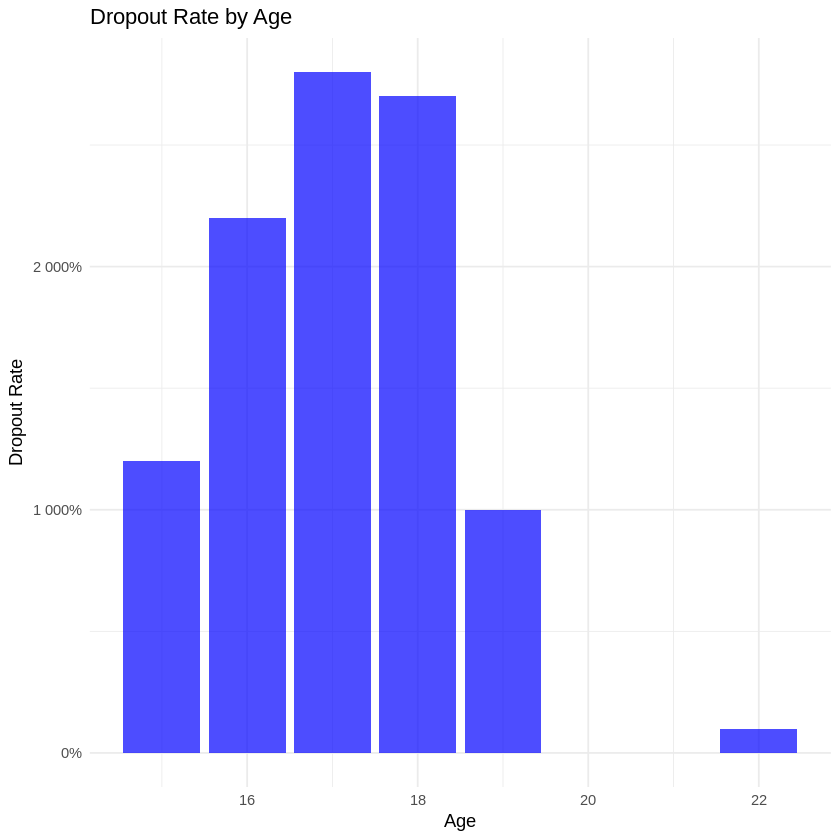

In [ ]:
ggplot(binary_data, aes(x = Age, y = Dropped_Out)) +
  geom_col(fill = "blue", alpha = 0.7) +
  labs(title = "Dropout Rate by Age", x = "Age", y = "Dropout Rate") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal()

We can see that students tend to drop out during the standard age. Being an extra year or two late does not increase the dropout rates.

Let's see how older age affects grades:

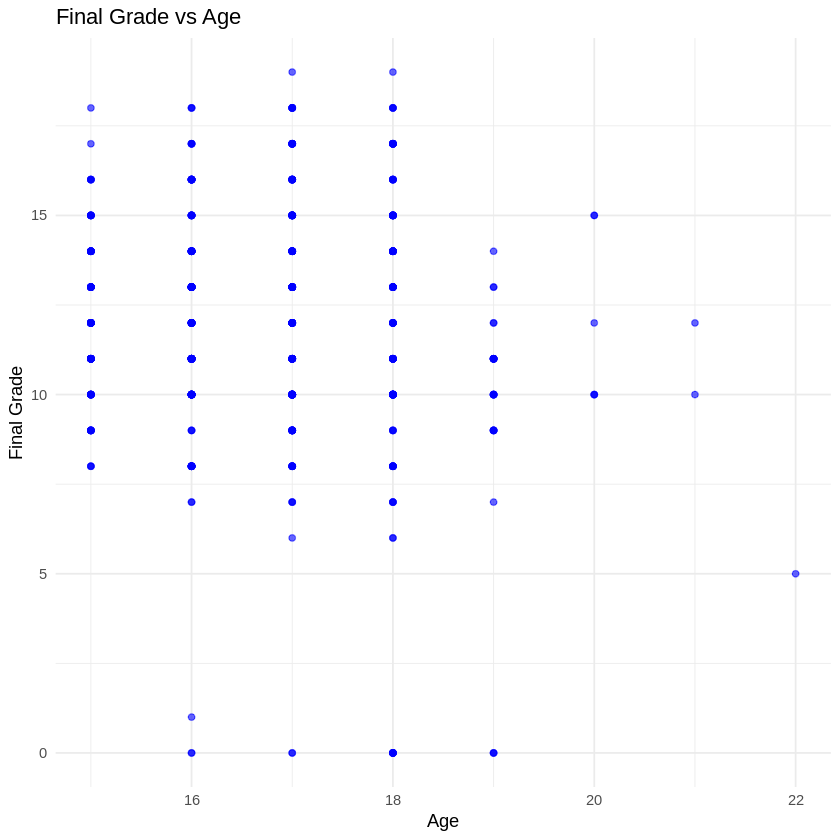

In [ ]:
ggplot(data, aes(x = Age, y = Final_Grade)) +
  geom_point(color = "blue", alpha = 0.6) +  # Scatter points
  labs(title = "Final Grade vs Age",
       x = "Age",
       y = "Final Grade") +
  theme_minimal()

Grades are generally good or passing for students of  older age. Older age does not affect grades either.

**Let's see how grades vary with respect to dropouts and enrolled students.**

Dropped_Out,Grade_1,Grade_2,Final_Grade
<chr>,<dbl>,<dbl>,<dbl>
False,12.05829,12.30601,12.81967
True,7.78000,7.53000,6.89000


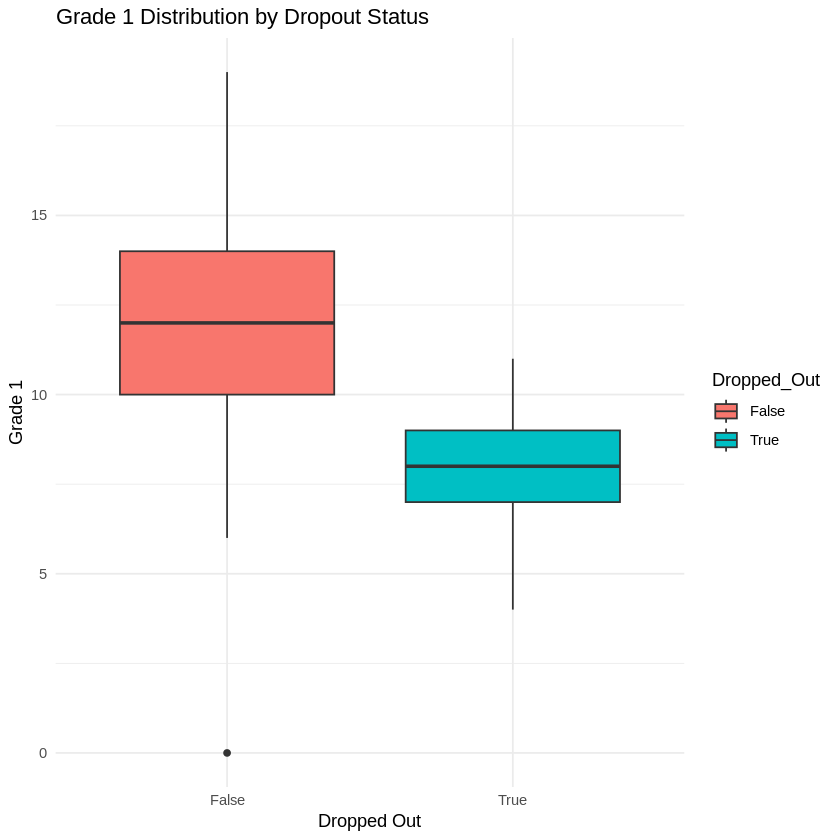

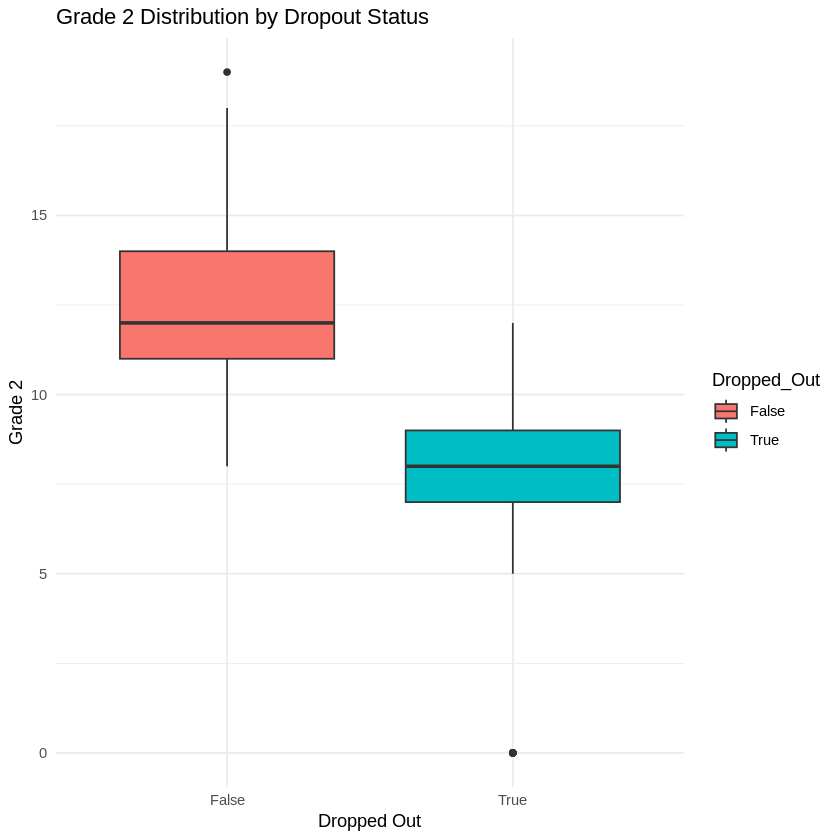

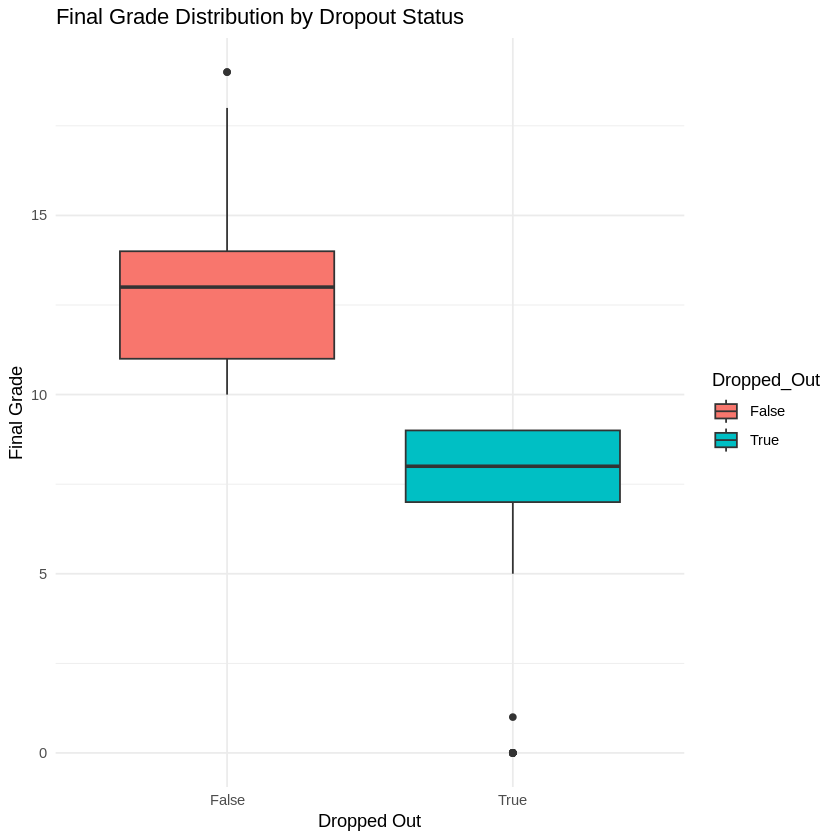

In [ ]:
aggregate_dropout <- aggregate(cbind(Grade_1,Grade_2,Final_Grade) ~ Dropped_Out, data = data, FUN = mean)

aggregate_dropout


ggplot(data, aes(x = Dropped_Out, y = Grade_1, fill = Dropped_Out)) +
  geom_boxplot() +
  labs(title = "Grade 1 Distribution by Dropout Status", x = "Dropped Out", y = "Grade 1") +
  theme_minimal()

# Grade 2 Boxplot
ggplot(data, aes(x = Dropped_Out, y = Grade_2, fill = Dropped_Out)) +
  geom_boxplot() +
  labs(title = "Grade 2 Distribution by Dropout Status", x = "Dropped Out", y = "Grade 2") +
  theme_minimal()

# Final Grade Boxplot
ggplot(data, aes(x = Dropped_Out, y = Final_Grade, fill = Dropped_Out)) +
  geom_boxplot() +
  labs(title = "Final Grade Distribution by Dropout Status", x = "Dropped Out", y = "Final Grade") +
  theme_minimal()


Dropouts tend to have generally lower grades than those who continue studying.

**Let's visualize grades for students that dropped out only to see how they change.**

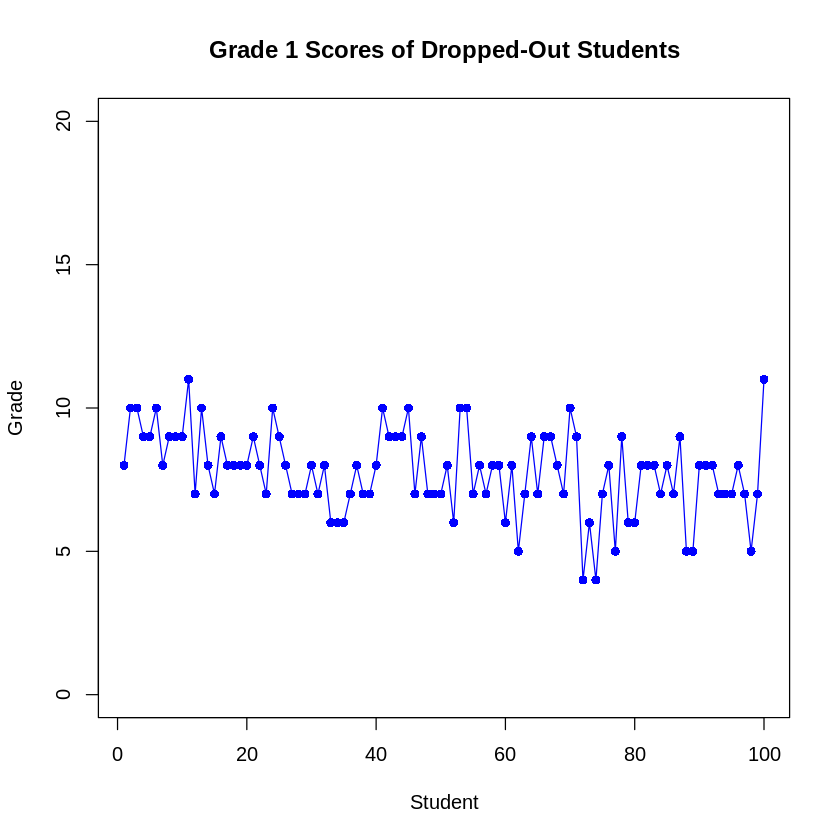

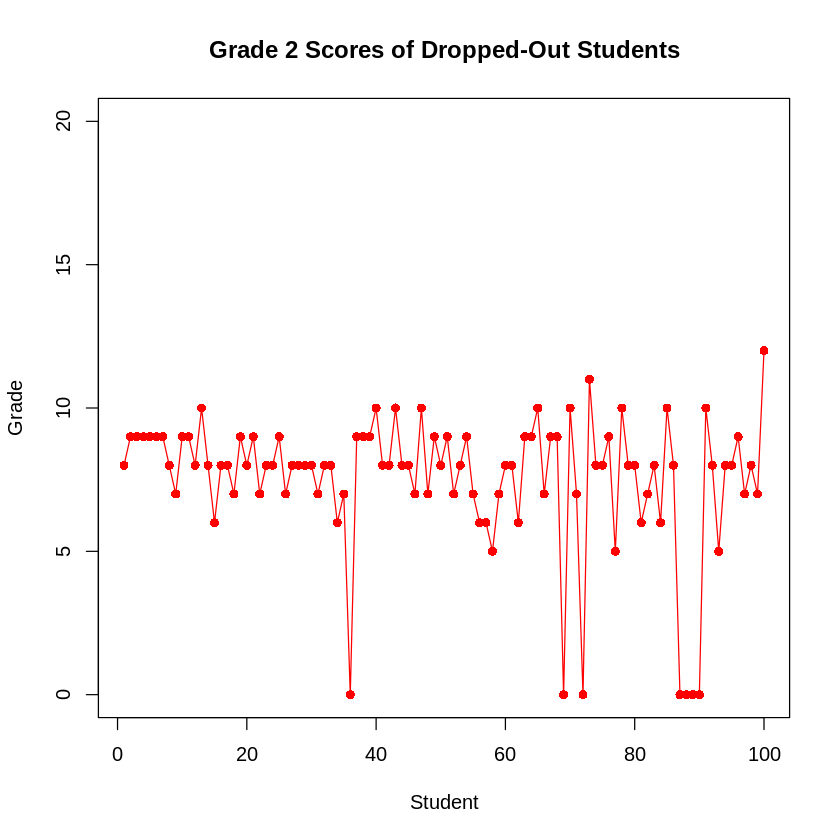

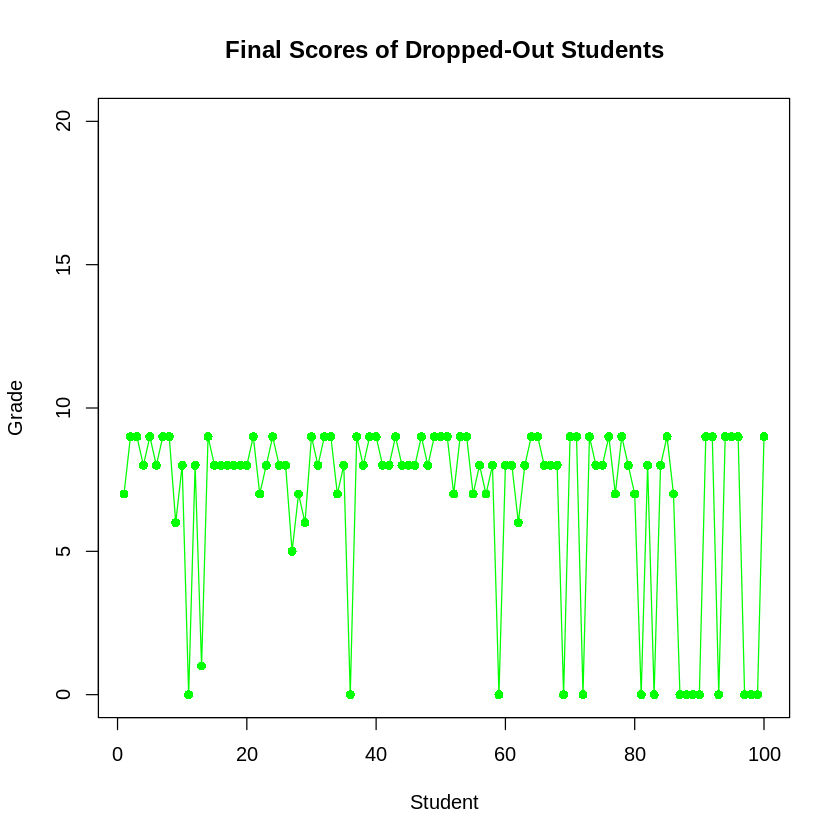

In [ ]:
data_dropped <- data[data$Dropped_Out == "True", ]

# PLOT 1: Grades in Grade 1
plot(data_dropped$Grade_1, type = "o", col = "blue", pch = 16,
     xlab = "Student", ylab = "Grade", main = "Grade 1 Scores of Dropped-Out Students",
     ylim = c(0, 20))

# PLOT 2: Grades in Grade 2
plot(data_dropped$Grade_2, type = "o", col = "red", pch = 16,
     xlab = "Student", ylab = "Grade", main = "Grade 2 Scores of Dropped-Out Students",
     ylim = c(0, 20))

# PLOT 3: Final Grades
plot(data_dropped$Final_Grade, type = "o", col = "green", pch = 16,
     xlab = "Student", ylab = "Grade", main = "Final Scores of Dropped-Out Students",
     ylim = c(0, 20))

We can deduce that a significant portion of students get 0 on the final grade. Meaning that they already dropped before taking their final grade. So in other words, students tend to drop out after taking 2 grades lower than the average.

# Summary:
1.  Males tend to dropout more than females.
2.  Bad family relationships and having one parent staying at home tends to increase the rate of dropping out.
3.  Having a guardian other than the mother/father also tends to increase chances of dropout.
4.  High number of previous class failures and alcohol consumption usually lead to increasing the chance of dropping out.




# Let's try building machine learning models for future dropout predictions.

In [ ]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘hardhat’, ‘ipred’, ‘e1071’, ‘pROC’, ‘recipes’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
set.seed(123)

data$Dropped_Out <- as.factor(data$Dropped_Out)

split <- createDataPartition(data$Dropped_Out, p = 0.8, list = FALSE)
Data_train <- data[split, ]
Data_test <- data[-split, ]

In [ ]:
rf_model <- randomForest(Dropped_Out ~ ., data = Data_train)

print(rf_model)


Call:
 randomForest(formula = Dropped_Out ~ ., data = Data_train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 0%
Confusion matrix:
      False True class.error
False   440    0           0
True      0   80           0


In [ ]:
predictions <- predict(rf_model,Data_test)

conf_matrix <- confusionMatrix(predictions, Data_test$Dropped_Out)
print(conf_matrix)


Confusion Matrix and Statistics

          Reference
Prediction False True
     False   109    0
     True      0   20
                                     
               Accuracy : 1          
                 95% CI : (0.9718, 1)
    No Information Rate : 0.845      
    P-Value [Acc > NIR] : 3.647e-10  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.845      
         Detection Rate : 0.845      
   Detection Prevalence : 0.845      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : False      
                                     


**Accuracy is 100%.**

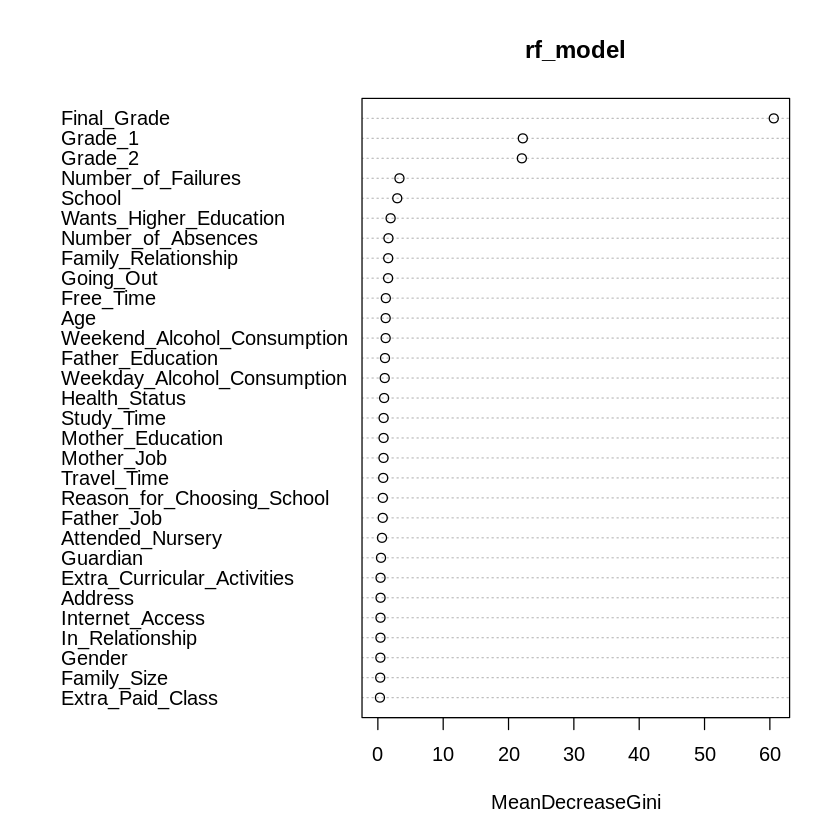

In [ ]:
varImpPlot(rf_model)

Higher mean decrease Gini = higher significance to dropout rate.

This graph shows us the most important factors that impact final grade. Other than the grades, number of failures, school, wants higher education, number of absences and family relationships are one of the most effective factors in dropout rates.

**Since the model runs with 100% accuracy, we do not need to try other models.**

In [ ]:
probabilities <- predict(rf_model,Data_test, type = "prob")
mean(probabilities[,1])
mean(probabilities[,2])

[1] 0.8443721

[1] 0.1556279

**Probability of students to dropout/stay in model is very similar tot he one in the original data.**

In [ ]:
misclassified <- Data_test[predictions != Data_test$Dropped_Out, ]
print(misclassified)

 [1] School                      Gender                     
 [3] Age                         Address                    
 [5] Family_Size                 Parental_Status            
 [7] Mother_Education            Father_Education           
 [9] Mother_Job                  Father_Job                 
[11] Reason_for_Choosing_School  Guardian                   
[13] Travel_Time                 Study_Time                 
[15] Number_of_Failures          School_Support             
[17] Family_Support              Extra_Paid_Class           
[19] Extra_Curricular_Activities Attended_Nursery           
[21] Wants_Higher_Education      Internet_Access            
[23] In_Relationship             Family_Relationship        
[25] Free_Time                   Going_Out                  
[27] Weekend_Alcohol_Consumption Weekday_Alcohol_Consumption
[29] Health_Status               Number_of_Absences         
[31] Grade_1                     Grade_2                    
[33] Final_Grade        

**Misclassified returned an empty dataframe, indicating that no students were misclassified.**